<h1>데이터 가져오기 & 데이터 확인하기</h1>

문제 해결을 위해 우선 당뇨병 환자 데이터를 가져온다.

In [98]:
# 데이터셋 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()      # diabetes에 당뇨병 데이터 저장

diabetes에 저장된 자료형은 딕셔너리와 유사한 Bunch 클래스다.  
그냥 파이썬의 딕셔너리라고 봐도 무방하다.  

In [99]:
# 입력데이터와 타깃데이터의 크기 확인
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


data는 442 * 10 크기의 2차원 배열이고 Target은 442개의 요소를 가진 1차원 배열이다.  

In [100]:
# diabetes.data에 저장된 데이터의 앞부분 샘플 3개만 출력
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

보시다시피 10개의 특성이 나열되어 있는 데이터가 3개가 출력된다.  

In [101]:
# 타겟 데이터 3개 출력
diabetes.target[0:3]

array([151.,  75., 141.])

<h1>데이터 시각화</h1>

matplitlib는 그래프를 그려주는 라이브러리로 주로 plt로 줄여말한다.  
scatter는 산점도, plot는 선그래프를 표현한다.

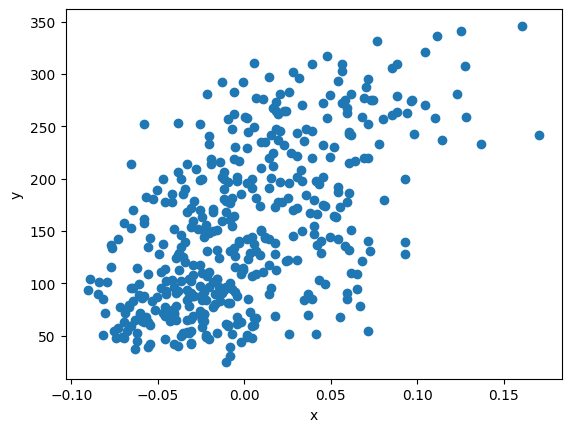

In [102]:
# diabetes 데이터를 산점도로 표시, 선으로 그릴 경우 낙서가 되므로 주의
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [103]:
# 훈련 데이터 준비
x = diabetes.data[:,2]
y = diabetes.target

<h1>경사 하강법</h1>

경사하강법은 산점도 그래프를 잘 표현한 직선 방정식을 찾는 것이다.  

<h2>예측값과 변화율 </h2>

예를 들어, y = 7x + 4 라는 모델에 x = 7 을 대입하면 y = 53이 나온다.  
여기서 53이 예측값이다.  

그렇다면 올바른 예측값을 어떻게 구할 수 있을까

위와같은 1차함수에서, 기울기를 w, 절편을 b로 예시를 두고 계산해보자


In [104]:
# w와 b 초기화
w = 1.0
b = 1.0

In [105]:
# 훈련데이터의 1번 샘플을 x에 대입하여 y값을 구하기
y_hat = x[0] * w + b      # 1차 함수 그래프 완성
print(y_hat)

1.0616962065186832


In [106]:
# 실제 타깃값 y[0]의 값을 출력
print(y[0])

151.0


y= x + 1 그래프로 x값에 따른 y값을 예상했을 때는 약 1.06이 나왔지만  
실제 값은 151.0이 나와야 했다.  
이는 차이가 너무 크다는 것을 의미함으로 함수를 조정해서 맞춰보자

In [107]:
# 새로운 기울기 값을 정의한다. 기존 기울기보다 0.1 증가했다.
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


기울기를 0.1만큼 늘리자 y값이 아주 조금 올라갔다.  
이번엔 기울기가 0.1만큼 증가했을 때, y값이 얼마나 증가했는지  
그 차이를 계산해보자

In [108]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


이 수치를 바탕으로 가중치를 업데이트하자

In [109]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


이번엔 변화율로 절편을 업데이트 해보자  
b가 0.1만큼 증가하면 y가 얼마나 증가하는지 계산한다.

In [110]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [111]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


b가 1 증가하면 y도 1 증가한다.  
b는 절편 값이니 당연한 결과다.  
즉, 절편 변화율은 그냥 1이다.

In [112]:
b_new = b + 1
print(b_new)

2.0


그런데 여전히 내가 구한 y값과 실제 y값의 괴리가 심하다.  
좀 더 적절한 업데이트 방법을 찾아보자

오차와 변화율을 곱해서 가중치를 업데이트하자

In [113]:
# err은 실제 y값과 내가 구한 y값의 차이다.
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [114]:
# 두 번째 샘플로 새로운 w와 b를 구한다.
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat              # 이 err은 두 번째 값을 기준으로 완성
w_rate = x[1]
w_new = w_new + w_rate * err    # 위에 나온 w_new(10.25...) 값에 두 번째 x 값 * err값을 더한다.
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


w값은 4정도 증가하고 절편 값은 반토막이 났다.  
이걸 모든 샘플에 수행해보자

In [115]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


이제 이걸 그래프로 그려주자

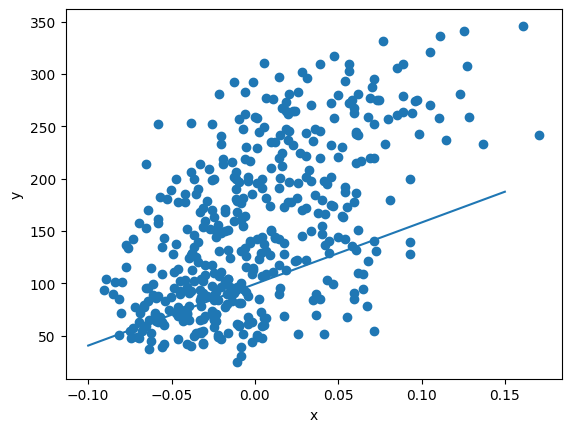

In [116]:
# 그래프와 산점도 표현
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

아주 만족스럽진 않지만 산점도를 어느정도 표현했다.

<h1>에포크</h1>

전체 훈련 데이터를 모두 이용하여 한 단위 작업을 진행하는 것을 에포크라고 부른다.  
일반적으로 수십 ~ 수천번의 에포크를 반복한다.  
우선 100번의 에포크를 반복해보자

In [117]:
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


w와 b의 값을 구했고 이를 그래프로 표현해 보자

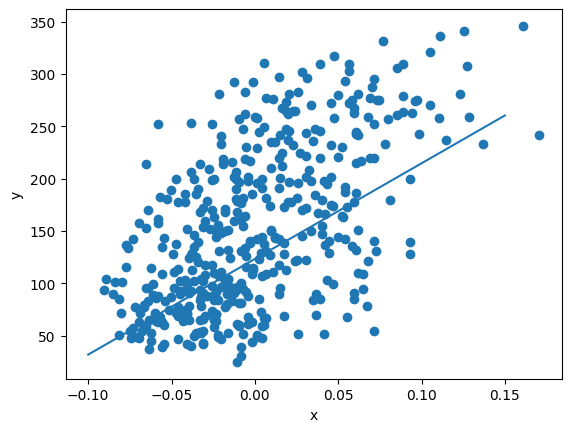

In [118]:
# 그래프와 산점도 표현
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

직선이 전체 데이터 경향을 제법 잘 따라간다.  
즉, 이 데이터에 잘 맞는 머신러닝 모델은 다음과 같다.  
  
y = 913.6x + 123.4

# 모델을 통한 예측
이번엔 x에 없었던 새로운 데이터가 발생했다고 가정해보자  
예측값을 얻으려면 어떻게 해야 할까?  

In [119]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


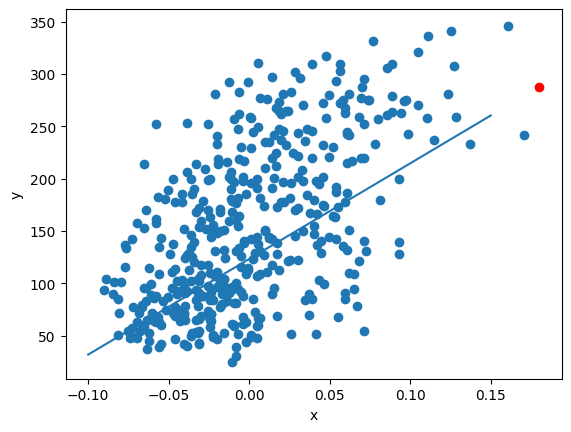

In [121]:
# 그래프와 산점도 표현
plt.scatter(x, y)
plt.scatter(x_new, y_pred, c='red')           # 새로 구한 부분의 값만 빨간색으로 표시
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])  # 아까 구한 머신러닝 모델
plt.xlabel('x')
plt.ylabel('y')
plt.show()

얼추 잘 예측하긴 했다.  
그런데 보면 알겠지만 결국 그래프 선의 연장선에 불과하다.  